In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def draw_env(w=35, h=50):
    plot((0, 0), (w,0), (w,h), (0,h))

In [3]:
import pickle
positions = []

with open("samples.dat", "rb") as f:
    positions = (pickle.load(f))

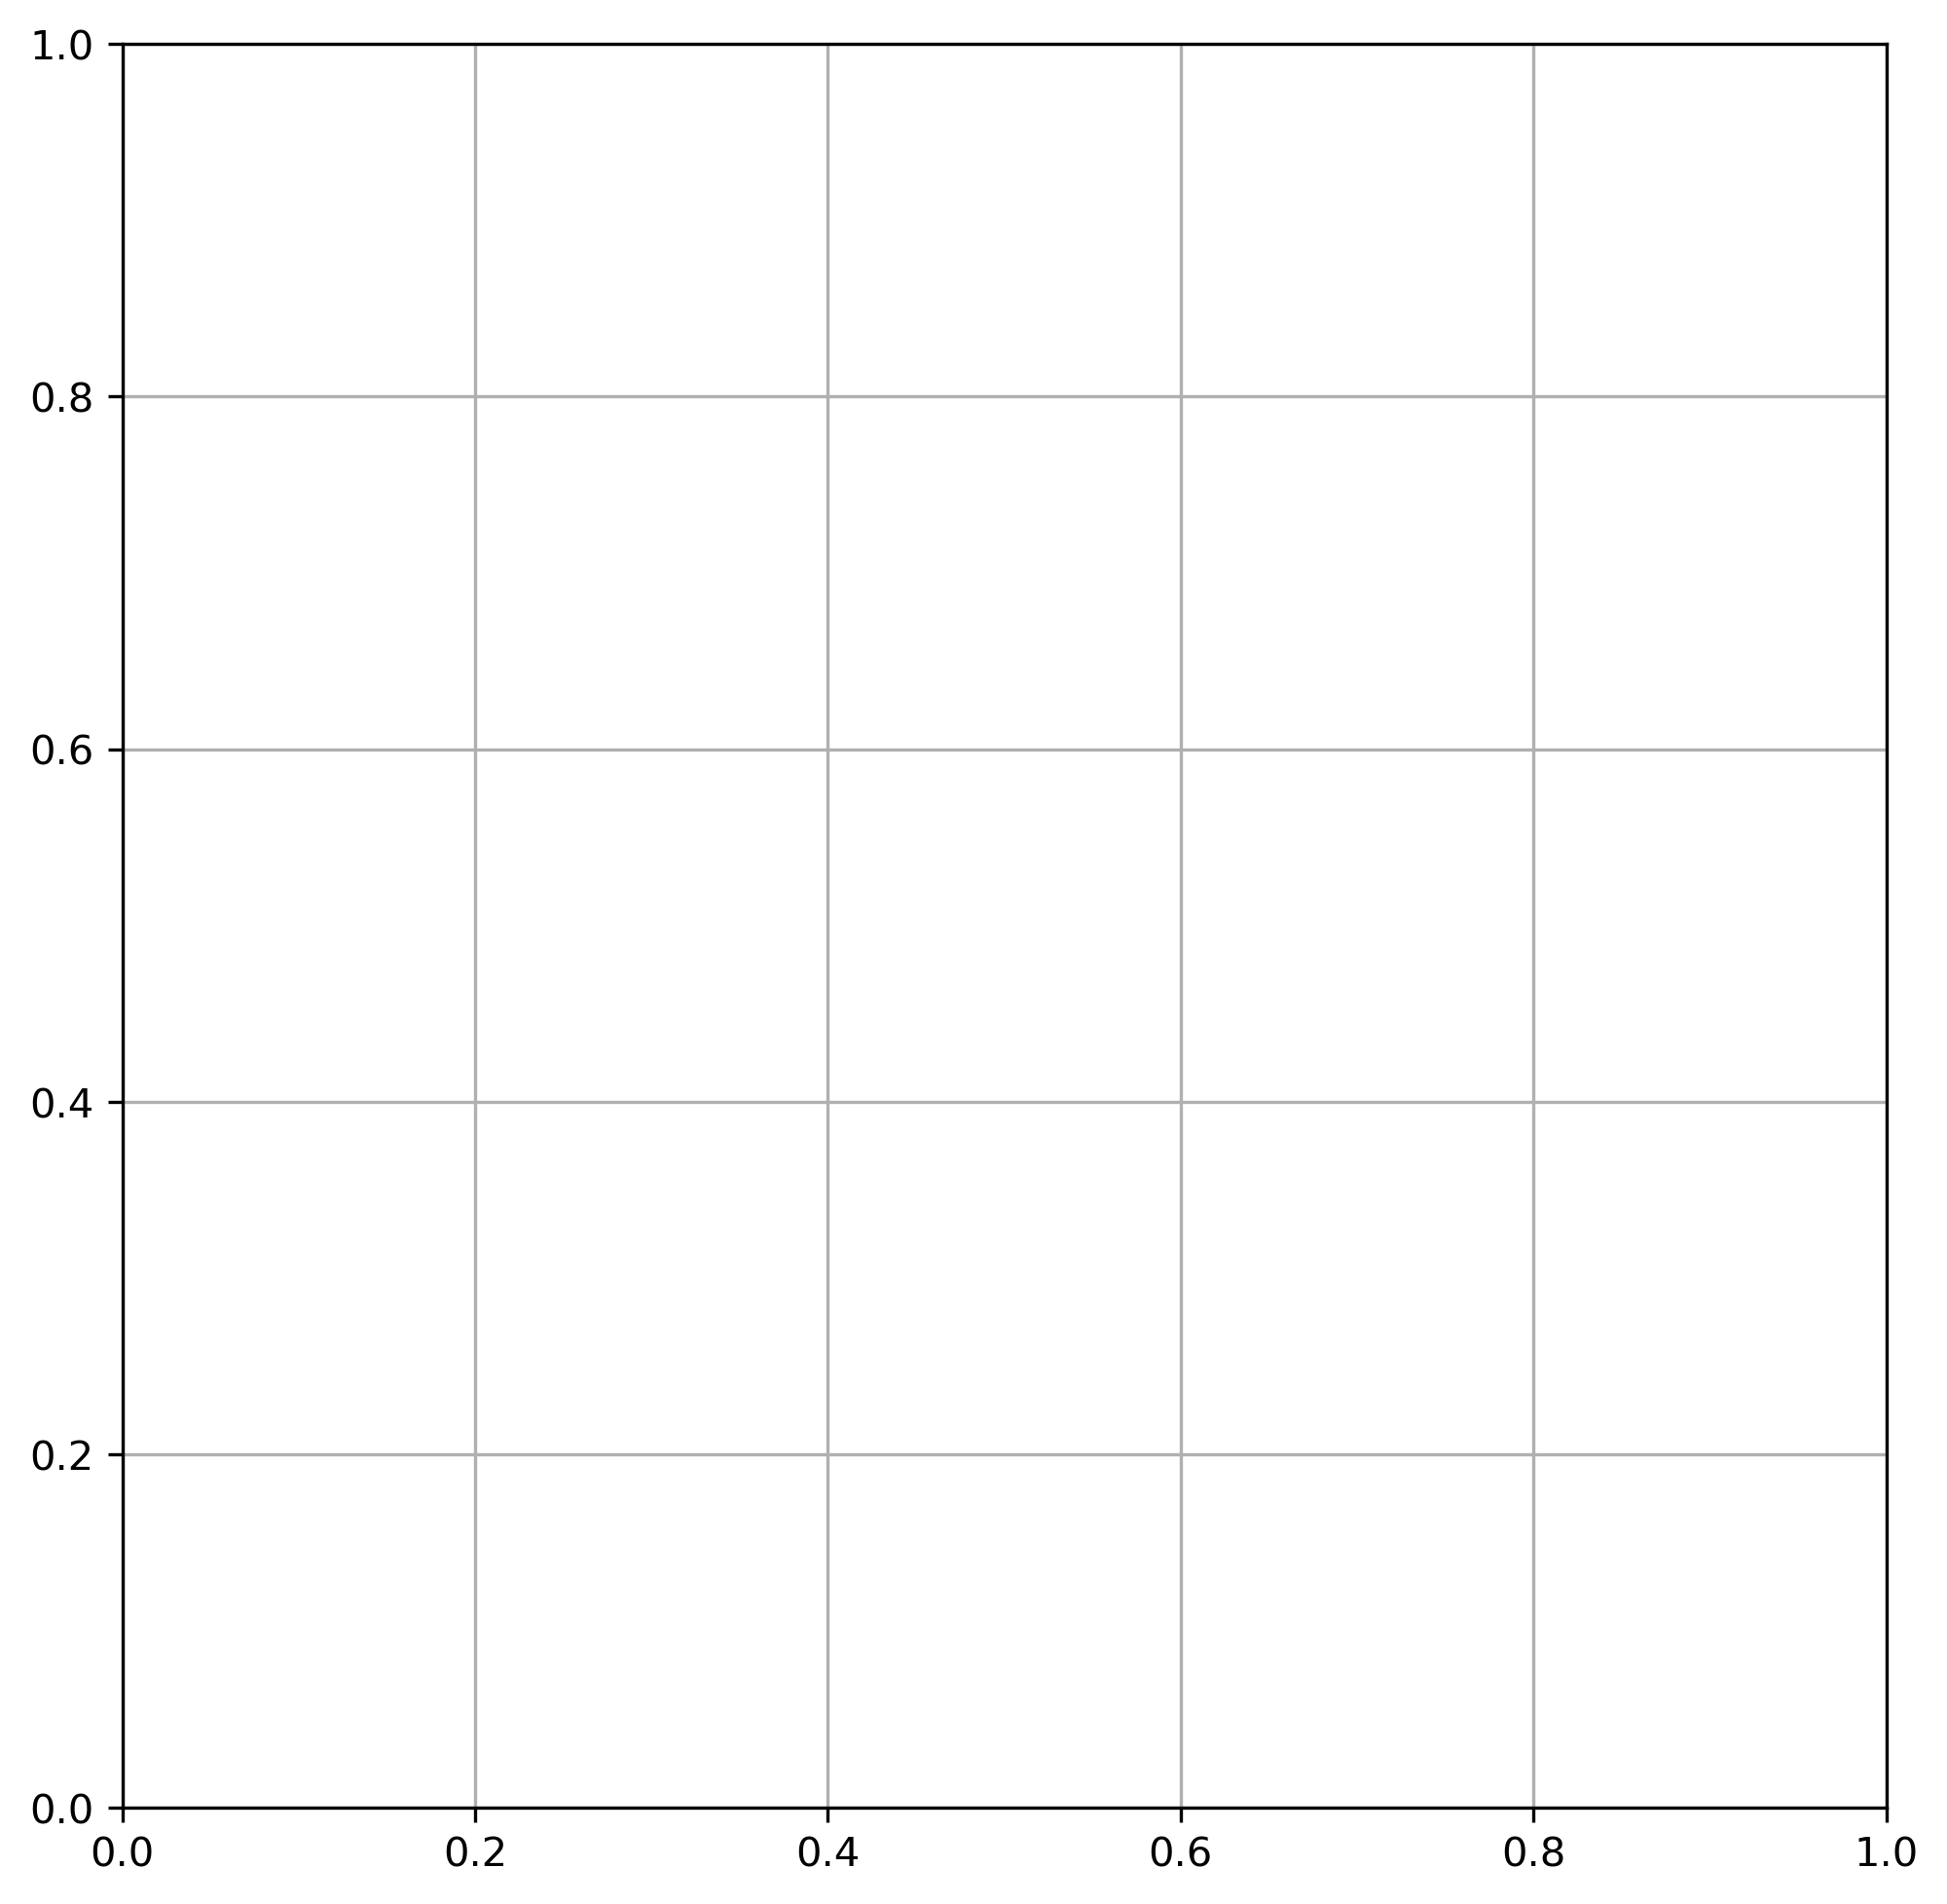

In [4]:
fig = plt.figure(figsize=(10, 8), frameon=True, dpi=300)
ax = fig.add_subplot(111)
ax.set_aspect("equal", adjustable="box")
ax.grid()

In [5]:
def draw_env():
    plot((0,w), (0,0), 'g')
    plot((0,0), (h,0), 'g')
    plot((w,w), (h,0), 'g')
    plot((0,w), (h,h), 'g')
    grid()

In [20]:
def draw_particles(P, color='black'):
    xx, yy, θθ = P.T
    plot(xx,yy, 'k.')
    quiver(xx,yy, cos(θθ), sin(θθ), color=color)


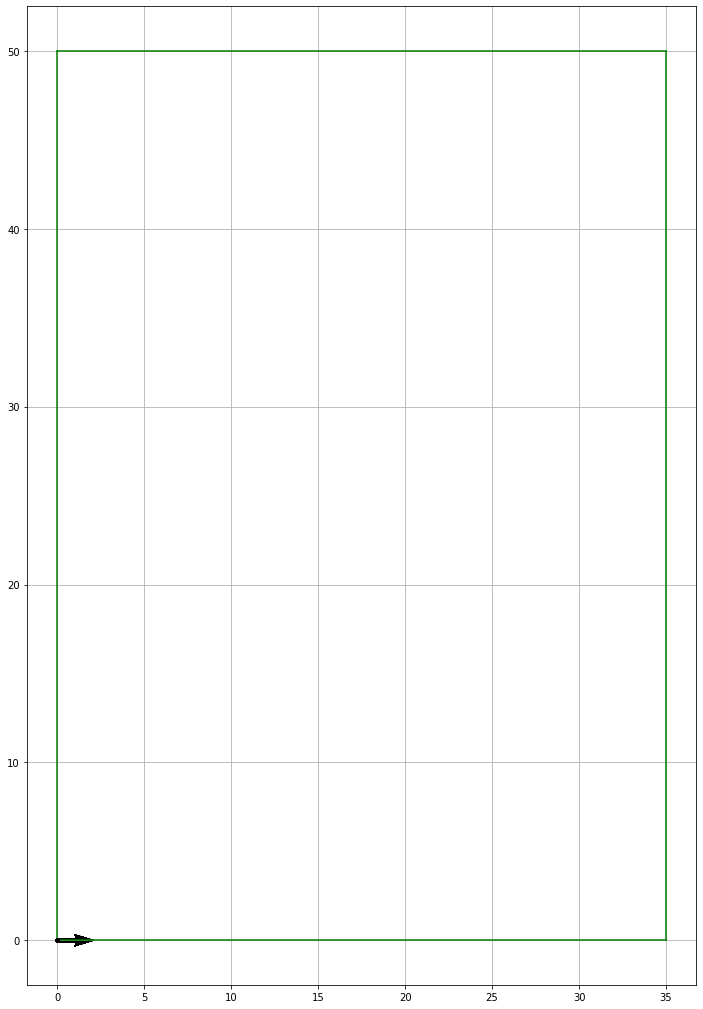

In [43]:
w = 35
h = 50
n = 100 # particles


# Particles
xx = random.sample(n) * w * 0
yy = random.sample(n) * h * 0
θθ = random.sample(n) * 2*pi * 0

P = np.vstack((xx, yy, θθ)).T

pylab.rcParams['figure.figsize'] = (2*6.0, 2*9.0)

draw_env()
draw_particles(P)

In [11]:
# statistical parameters
mu_u = [1.2, 1.2, 0]
sigma_u = [0.1, 0.1, 0.1]

In [24]:
## Particle Motion
def move_particles(P):
    newP = []
    for x,y,theta in P:
        d = np.linalg.norm([x,y])

        # 1. motion model
        dx = d * cos(theta)
        dy = d * sin(theta)
        dtheta = 0

        # 2. estimation
        mu_x = x + dx
        mu_y = y + dy
        mu_theta = theta + dtheta

        # 3. sampling
        xt = random.normal(mu_x, sigma_u[0])
        yt = random.normal(mu_y, sigma_u[1])
        thetat = random.normal(mu_theta, sigma_u[2])

        newP.append([xt, yt, theta])
    return np.array(newP)

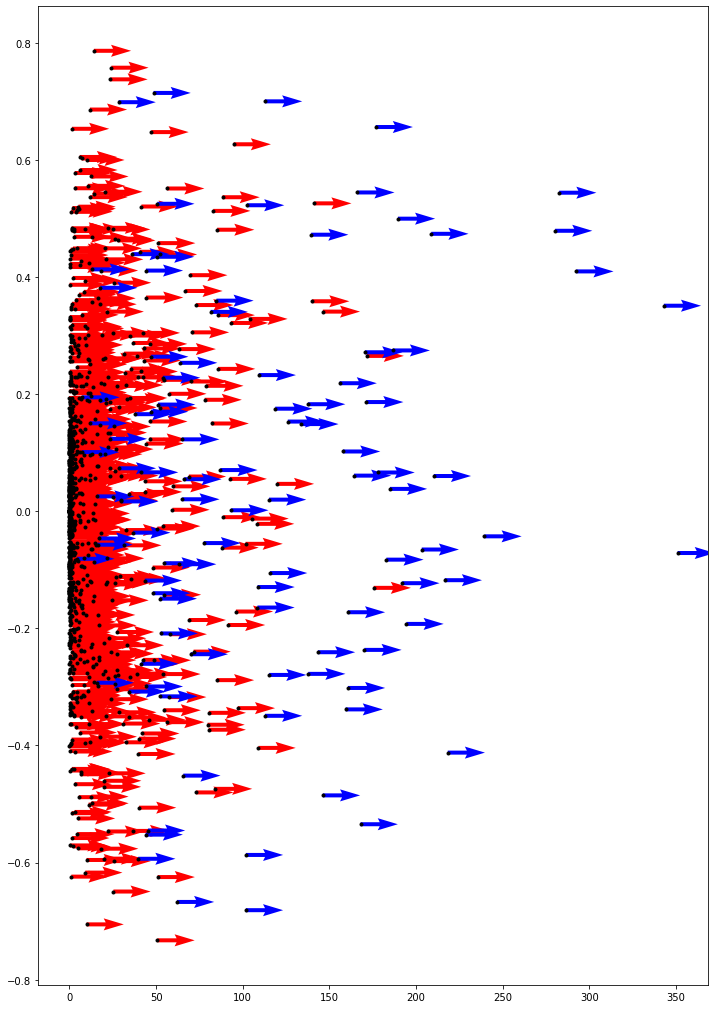

In [44]:
#draw_env()
draw_particles(P)
for i in range(0,10):
    P = move_particles(P)
    draw_particles(P, 'r')
P = move_particles(P)
draw_particles(P, 'b')

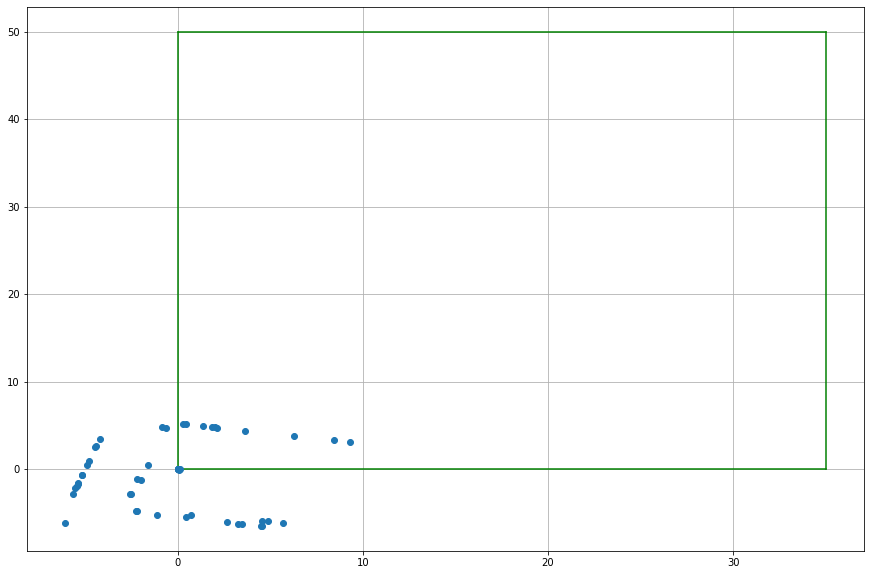

In [75]:
# NOW: try on data
samples = numpy.array(positions[0])
idx = np.random.randint(len(positions[0]), size=50)
samples = samples[idx,:].T

xx = samples[1] * cos(radians(samples[0]))
yy = samples[1] * sin(radians(samples[0]))
θθ = [-pi / 6.0] * len(xx)
P = np.vstack((xx, yy, θθ)).T

draw_env()
#draw_particles(P)
plot(xx, yy, 'o')

In [3]:
draw_env()
draw_particles(P)
for i in range(0,3):
    P = move_particles(P)
    draw_particles(P, 'r')
P = move_particles(P)
draw_particles(P, 'b')

NameError: name 'draw_env' is not defined